# Teleporte Quântico

## Pesquisa Conceitual


#### Trasferindo Informação Quântica

Suponha que temos dois pesquisadores, Alice e Bob, e Alice deseja enviar o seu estado quântico para Bob. O protocolo de Teleporte Quântico permite a Alice fazer isso.

Podemos descrevê-lo em algumas etapas:
1. **Preparação de Estado**: Alice inicializa seu qubit no estado que deseja teleportar;
2. **Emaranhamento Compartilhado**: Um estado de Bell é criado e distribuído entre Alice e Bob, um qubit para cada;
3. **Mudança de Bases**: Alice converte seu qubit da base de Bell para a base computacional;
4. **Meição**: Alice mede seus dois qubits, e informa a Bob como converter seu qubit para obter o estado desejado.

Note-se que apenas a informação quântica é teleportada, e não a partícula física. A transmissão dos bits clássicos na Etapa 4 garante que o processo seja limitado pela velocidade da luz e que o Teorema da Não-Clonagem seja respeitado.

#### Teorema da Não-Clonagem

Mas Alice não poderia simplismente fazer uma copia do estado e enviala para Bob?

Copiar estado arbitrarios é proibido, e podemos entender o porque utilizando do teorema de não-clonagem. Suponha que queremos desenhar um circuito $U$ que pode realizar as seguintes operações

$$
\begin{aligned}
  & U(|\psi\rangle\otimes|s\rangle) = |\psi\rangle\otimes|\psi\rangle, \\
  & U(|\varphi\rangle\otimes|s\rangle) = |\varphi\rangle\otimes|\varphi\rangle,
\end{aligned}
$$

onde $|\psi\rangle$ e $|\varphi\rangle$ são estados arbitrários normalizados de um-qubit, e $|s\rangle$ é um estado arbitrários inicial também normalizado. Vamos mostrar que tal $U$ não existe.

Tomemos o produto interno do lado esquerdo das duas equações:

$$
\begin{aligned}
  (\langle\psi|\otimes\langle s|)U^{\dagger}U(|\varphi\rangle\otimes|s\rangle) = \langle\psi|\varphi\rangle \langle s | s\rangle
\end{aligned}
$$

Como $\langle s | s\rangle$ é 1, avaliamos apenas $\langle\psi|\varphi\rangle$.

Como próximo passo, encontramos o produto interno do lado direito da equação, que resulta em $(\langle\psi|\varphi\rangle)^2$. Esses produtos internos devem ser iguais, isto só ocorre quando estes são valores que são quadrados de sim mesmo. Sendo que os únicos valores possíveis para o produto interno é 0 e 1. Mas se o produto interno for 1, os estados são o mesmo, do contrário se o produto interno for 0, os estados são ortogonais. Portanto, não podemos clonar estado arbitrários.

## Implementação Prática

### Instalação

In [1]:
!pip install qiskit qiskit-aer qiskit_ibm_runtime matplotlib pylatexenc

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 13.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 19.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.9 MB/s eta 0:00:0031m36.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 28.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 33.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 KB 9.1 MB/s eta 0:00:00
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 14.3 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 KB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime.fake_provider import FakeFez
from qiskit_ibm_runtime import SamplerV2
from qiskit.circuit.library import StatePreparation

### IBM Backend

In [ ]:
# Fazendo autenticação no IBM Quantum
QiskitRuntimeService.save_account(
  token="",
  channel="ibm_cloud",
  instance="",
  overwrite=True
)

service = QiskitRuntimeService(channel="ibm_cloud")
print(service.backends())

[<IBMBackend('ibm_fez')>, <IBMBackend('ibm_torino')>, <IBMBackend('ibm_marrakesh')>]


### Circuito - Teleportando 1 Qubit

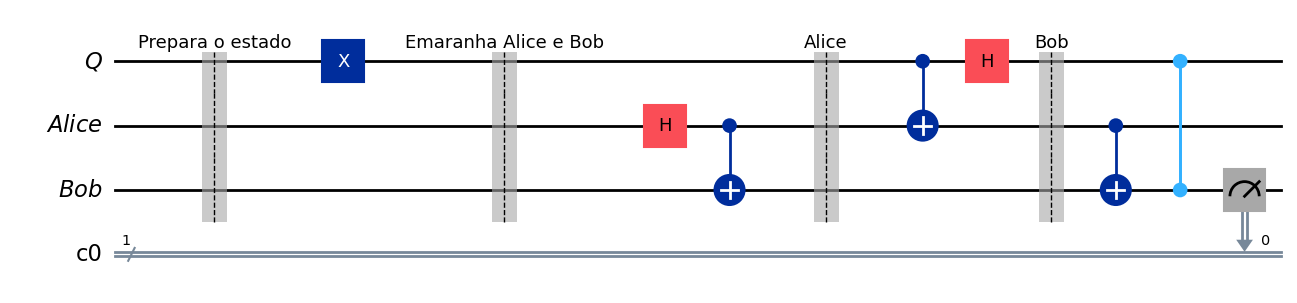

In [3]:
## >- Circuito: Teleporte Quântico -< ##

Q = QuantumRegister(1, "Q") # Qubit com a informação
a_bit = QuantumRegister(1, "Alice") # Qubit da Alice
b_bit = QuantumRegister(1, "Bob") # Qubit do Bob

cbit = ClassicalRegister(1) # Bit clássico para leitura

# Cria o circuito quântico com os qubits Q, Alice e Bob, e 1 bits clássicos
qcTq = QuantumCircuit(Q, a_bit, b_bit, cbit)

## Prepara um estado ##
mensagem = input("Entre com a informação a ser teleportada (0 ou 1): ")
while mensagem != '0' and mensagem != '1':
  print("Mensagem inválida!")
  mensagem = input("Entre com a informação a ser teleportada (0 ou 1): ")

if mensagem == "1":
  qcTq.barrier(label="Prepara o estado")
  qcTq.x(0)

## Emaranha Alice e Bob ##
qcTq.barrier(label="Emaranha Alice e Bob")
qcTq.h(1)
qcTq.cx(1, 2)

## Operações de Alice ##
qcTq.barrier(label="Alice")
qcTq.cx(0, 1)
qcTq.h(0)

## Operações de Bob
qcTq.barrier(label="Bob")
qcTq.cx(1, 2)
qcTq.cz(0, 2)
qcTq.measure(2, 0)

qcTq.draw("mpl", filename="imgs/circuito_teleport_1qubit.png")

#### Simulação sem Ruído

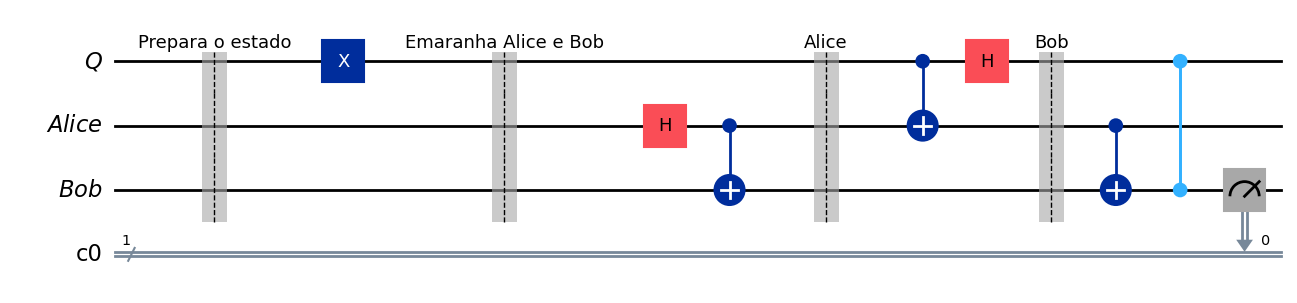

In [4]:
# >- Simulador sem ruído -< #

simulador = AerSimulator()

# Transpila o circuito para o simulador
qc_t = transpile(qcTq, backend=simulador)
qc_t.draw('mpl')

{'1': 1000}


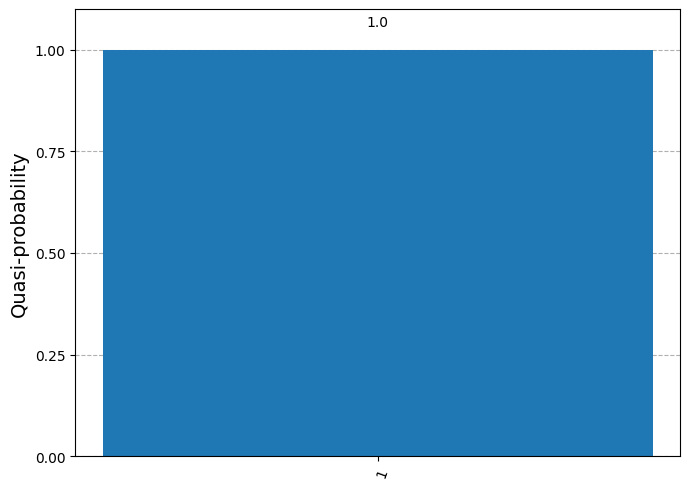

In [6]:
# >- Simulação sem ruído -< #

n_shots = 1000
job = simulador.run(qc_t, shots=n_shots)

result = job.result()
counts = result.get_counts()

print(counts)
plot_distribution(
    counts,
    filename="imgs/plot_1qubit_semRuido.png"
)
plot_distribution(counts)

#### Simulação com Ruído

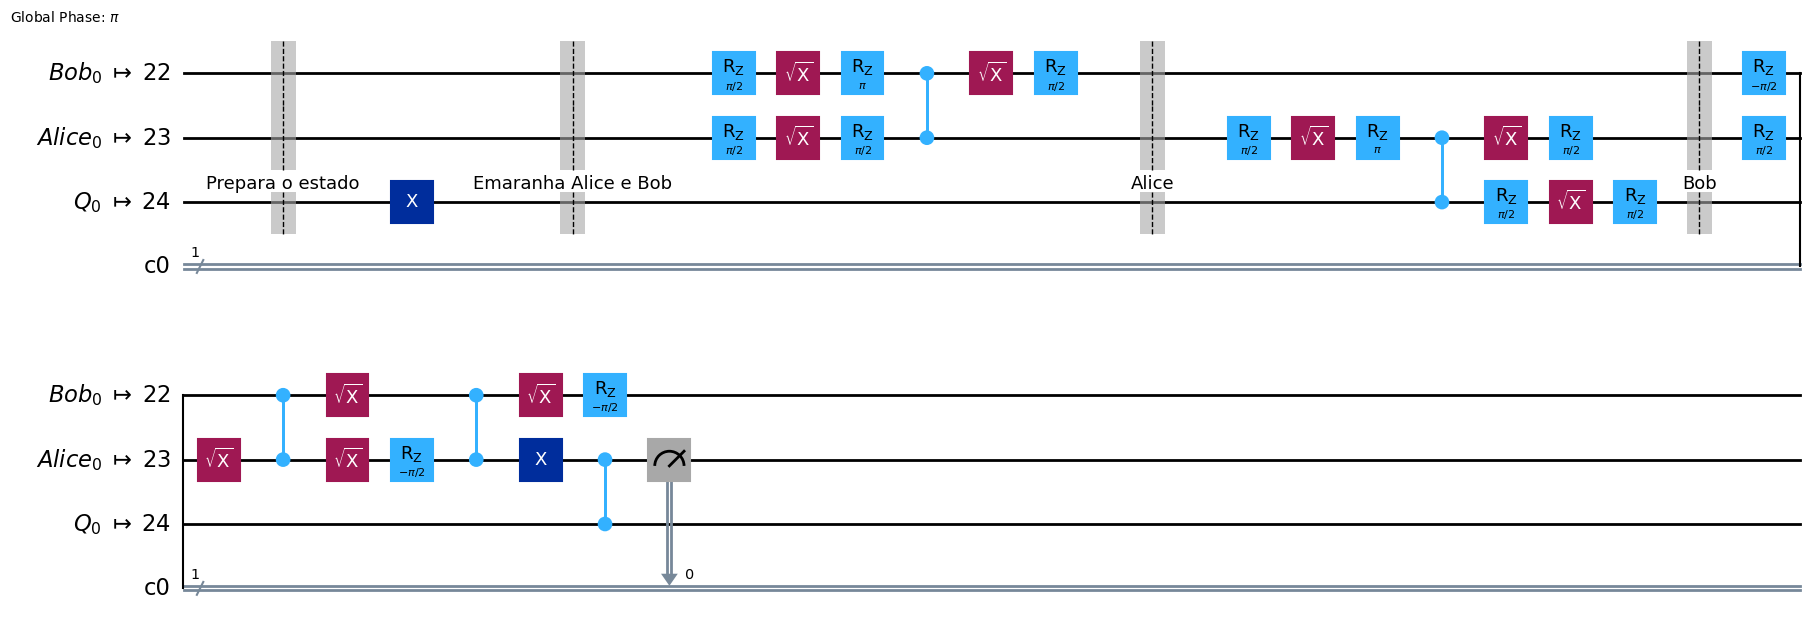

In [14]:
# >- Simulador com ruído -< #

# Pega as caracteristicas do computador desejado
backend = FakeFez()

# Gera o simulador com base nas caracteristicas
simulador = AerSimulator.from_backend(backend)

# Transpilando o circuito para esse computador
qc_t = transpile(qcTq, backend=simulador)

qc_t.draw("mpl")

{'0': 14, '1': 986}


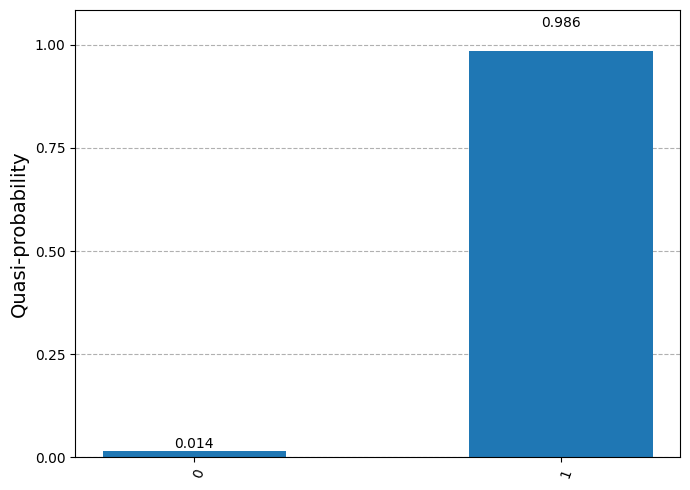

In [15]:
# >- Simulação com ruído -< #

n_shots = 1000
job = simulador.run(qc_t, shots=n_shots)

resultado = job.result()
counts = resultado.get_counts()

print(counts)
plot_distribution(
    counts,
    filename="imgs/plot_1qubit_comRuido.png"
)
plot_distribution(counts)

#### Rodando com IBM Backend

In [16]:
## Escolho o computador menos oculpado
backend = QiskitRuntimeService().least_busy(operational=True, simulator=False, min_num_qubits=127)
print(backend)

<IBMBackend('ibm_fez')>


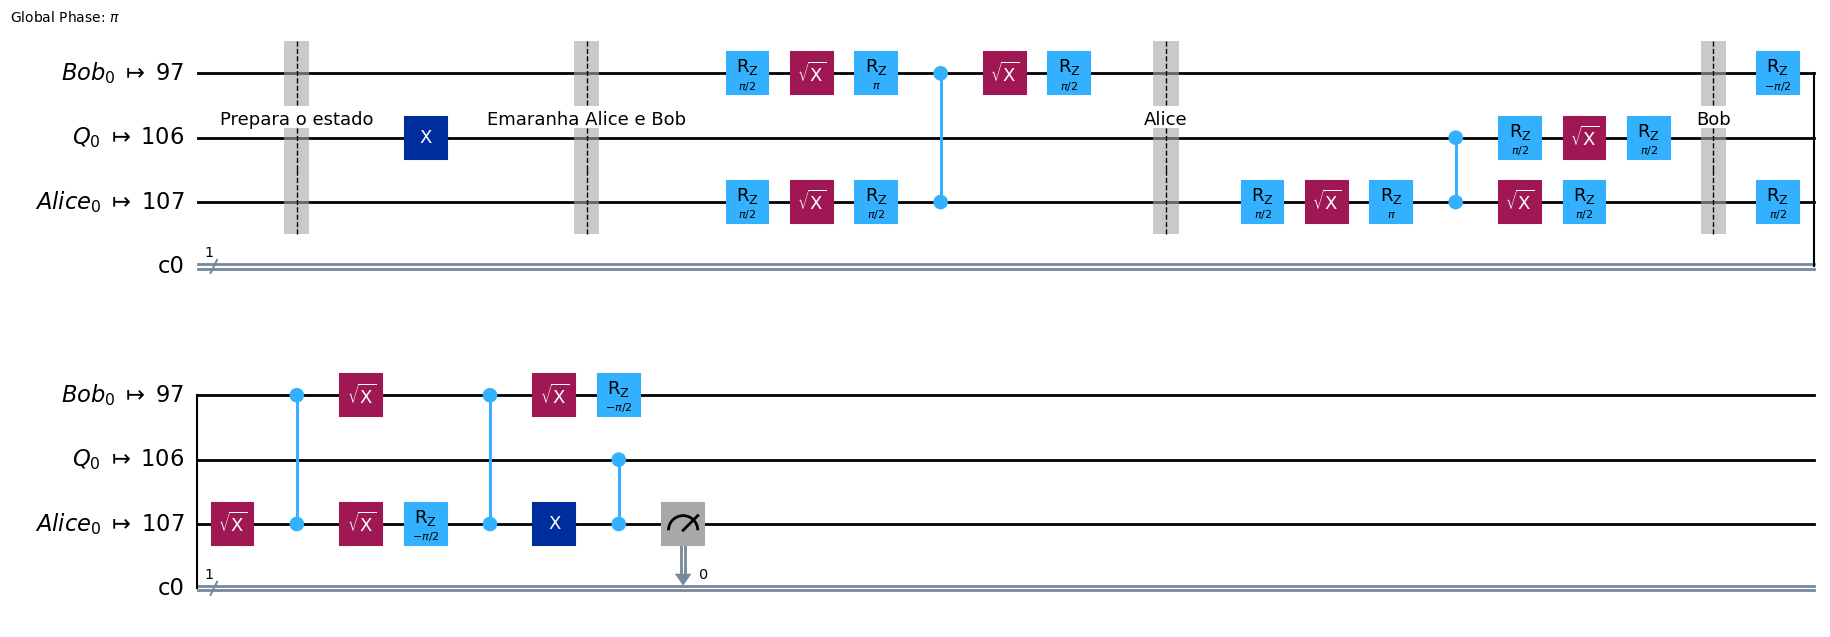

In [17]:
## Transpila o computador
qc_t = transpile(qcTq, backend)
qc_t.draw("mpl")

{'1': 963, '0': 37}


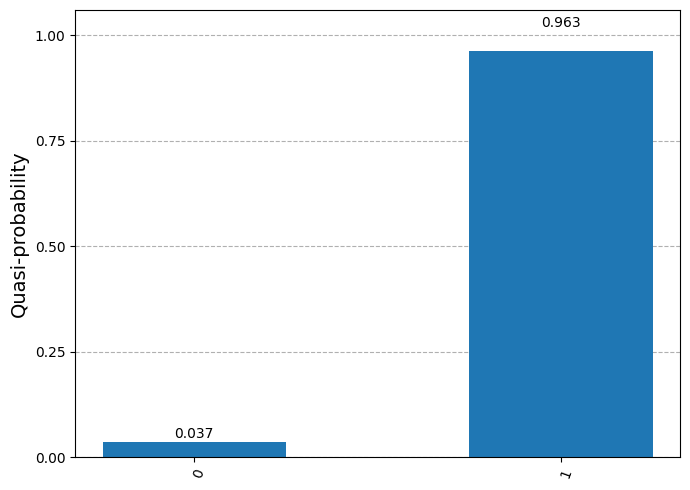

In [ ]:
# >- Executa em um computador da IBM -< #
sampler = SamplerV2(mode=backend)
n_shots = 1000

job = sampler.run([qc_t], shots=n_shots)

service = QiskitRuntimeService(
    channel='ibm_quantum_platform',
    instance=""
)
job_result = job.result()

pub_result = job_result[0].data.c6.get_counts() # <- Nessario alterar o cN para o cbit equivalente no circuito

print(pub_result)
plot_distribution(
    pub_result,
    filename="imgs/plot_1qubit_ibm.png"
)
plot_distribution(pub_result)

{'1': 963, '0': 37}


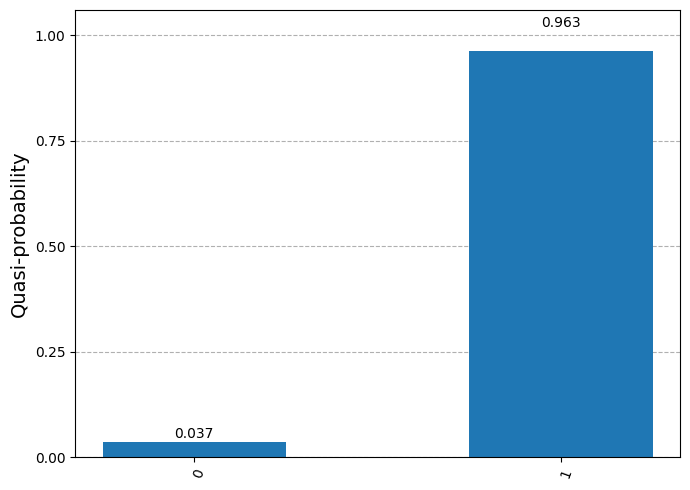

In [ ]:
# >- Busca o resultado -< #
service = QiskitRuntimeService(
    channel='ibm_quantum_platform',
    instance=''
)
job = service.job('')
job_result = job.result()

pub_result = job_result[0].data.c6.get_counts() # <- Nessario alterar o cN para o cbit equivalente no circuito

print(pub_result)
plot_distribution(
    pub_result,
    filename="imgs/plot_1qubit_ibm.png"
)
plot_distribution(pub_result)

### Circuito - Teleportando $N$ Qubit

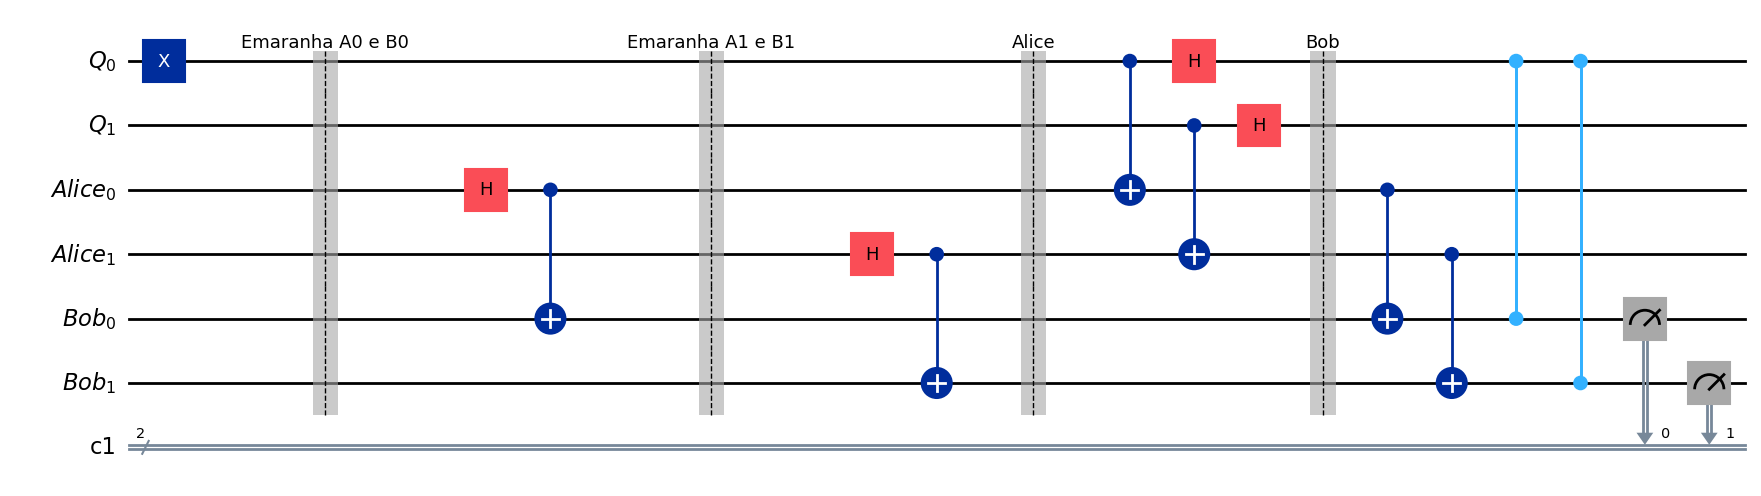

In [20]:
## >- Circuito: Teleporte Quântico N-Qubits -< ##

num_qbits = 2

Q = QuantumRegister(num_qbits, "Q") # Qubit com a informação
a_bit = QuantumRegister(num_qbits, "Alice") # Qubit da Alice
b_bit = QuantumRegister(num_qbits, "Bob") # Qubit do Bob

cbit = ClassicalRegister(num_qbits)

# Cria o circuito quântico com os qubits Q, Alice e Bob, e n bits clássicos
qcTq = QuantumCircuit(Q, a_bit, b_bit, cbit)

## Prepara um estado ##
mensagem = input("Entre com a informação a ser teleportada (00, 01, 10 ou 11): ")
while mensagem != '00' and mensagem != '01' and mensagem != '10' and mensagem != '11':
  print("Mensagem inválida!")
  mensagem = input("Entre com a informação a ser teleportada (00, 01, 10 ou 11): ")

if mensagem == "01":
  qcTq.x(0)
elif mensagem == "10":
  qcTq.x(1)
elif mensagem == "11":
  qcTq.x(0)
  qcTq.x(1)

## Emaranha Alice e Bob ##

qcTq.barrier(label="Emaranha A0 e B0")
qcTq.h(2)
qcTq.cx(2, 4)
qcTq.barrier(label="Emaranha A1 e B1")
qcTq.h(3)
qcTq.cx(3, 5)

## Operações de Alice ##

qcTq.barrier(label="Alice")
qcTq.cx(0, 2)
qcTq.h(0)
qcTq.cx(1, 3)
qcTq.h(1)

## Operações de Bob

qcTq.barrier(label="Bob")
qcTq.cx(2, 4)
qcTq.cz(0, 4)
qcTq.cx(3, 5)
qcTq.cz(0, 5)
qcTq.measure([4, 5], [0, 1])

qcTq.draw("mpl", filename="imgs/circuito_teleport_nQubits.png")

#### Simulação sem Ruído

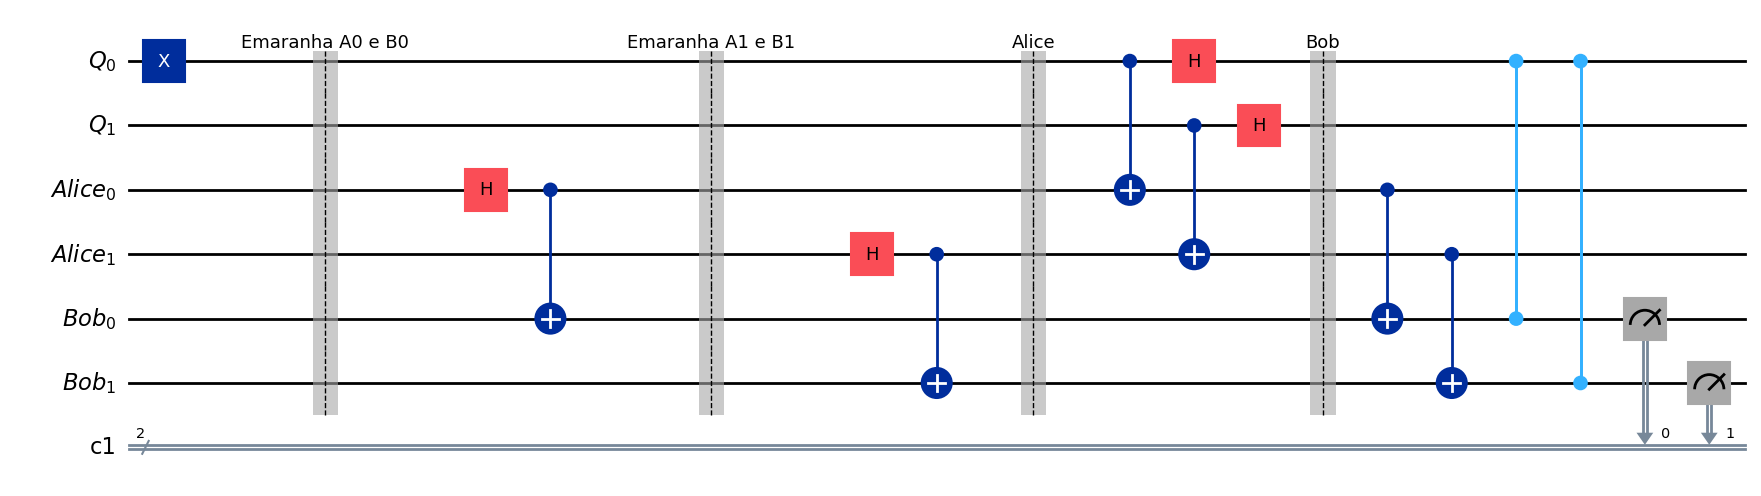

In [21]:
# >- Simulador sem ruído -< #

simulador = AerSimulator()

# Transpila o circuito para o simulador
qc_t = transpile(qcTq, backend=simulador)
qc_t.draw('mpl')

{'01': 1000}


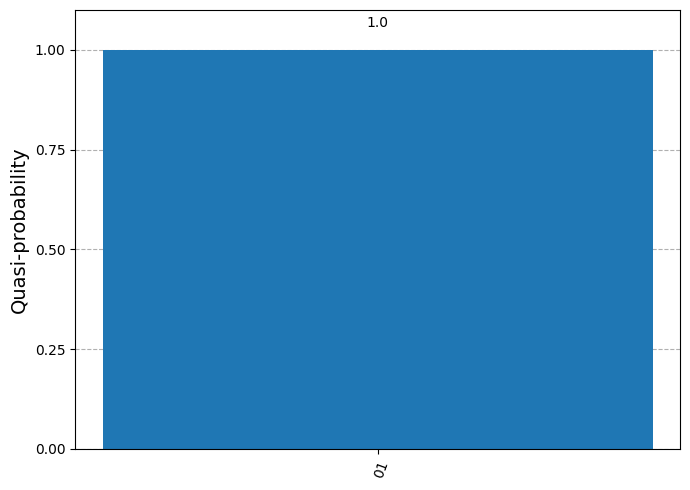

In [23]:
# >- Simulação sem ruído -< #

job = simulador.run(qc_t, shots=1000)

result = job.result()
counts = result.get_counts()

print(counts)
plot_distribution(
    counts,
    filename="imgs/plot_nQubits_semRuido.png"
)
plot_distribution(counts)

#### Simulação com Ruído

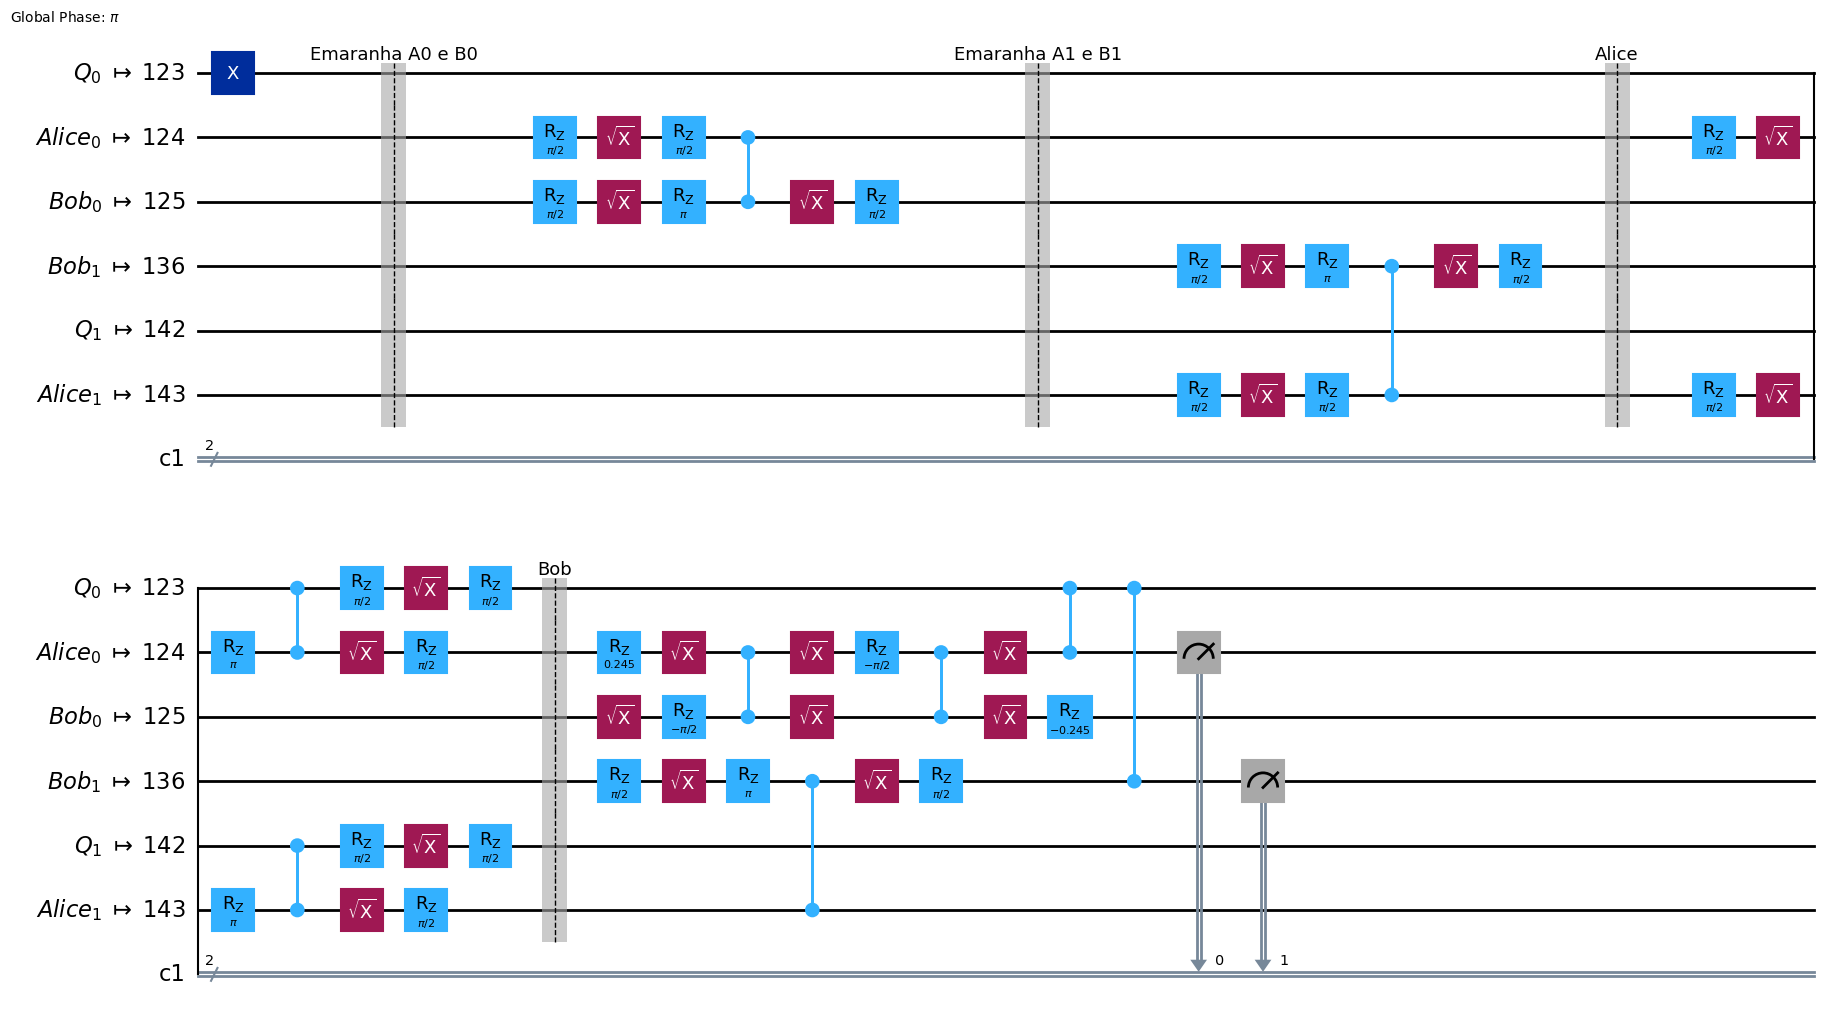

In [24]:
# >- Simulador com ruído -< #

# Pega as caracteristicas do computador desejado
backend = FakeFez()

# Gera o simulador com base nas caracteristicas
simulador = AerSimulator.from_backend(backend)

# Transpilando o circuito para esse computador
qc_t = transpile(qcTq, backend=simulador)
qc_t.draw('mpl')

{'00': 15, '11': 14, '01': 971}


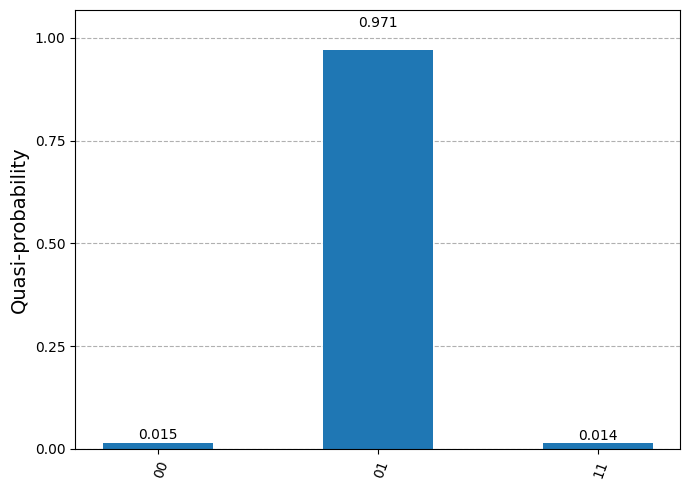

In [25]:
# >- Simulação com ruído -< #
n_shots = 1000
job = simulador.run(qc_t, shots=n_shots)

resultado = job.result()
counts = resultado.get_counts()

print(counts)
plot_distribution(
    counts,
    filename="imgs/plot_nQubits_comRuido.png"
)
plot_distribution(counts)

#### Rodando com IBM Backend

In [26]:
## Escolho o computador menos oculpado
backend = QiskitRuntimeService().least_busy(operational=True, simulator=False, min_num_qubits=127)
print(backend)

<IBMBackend('ibm_fez')>


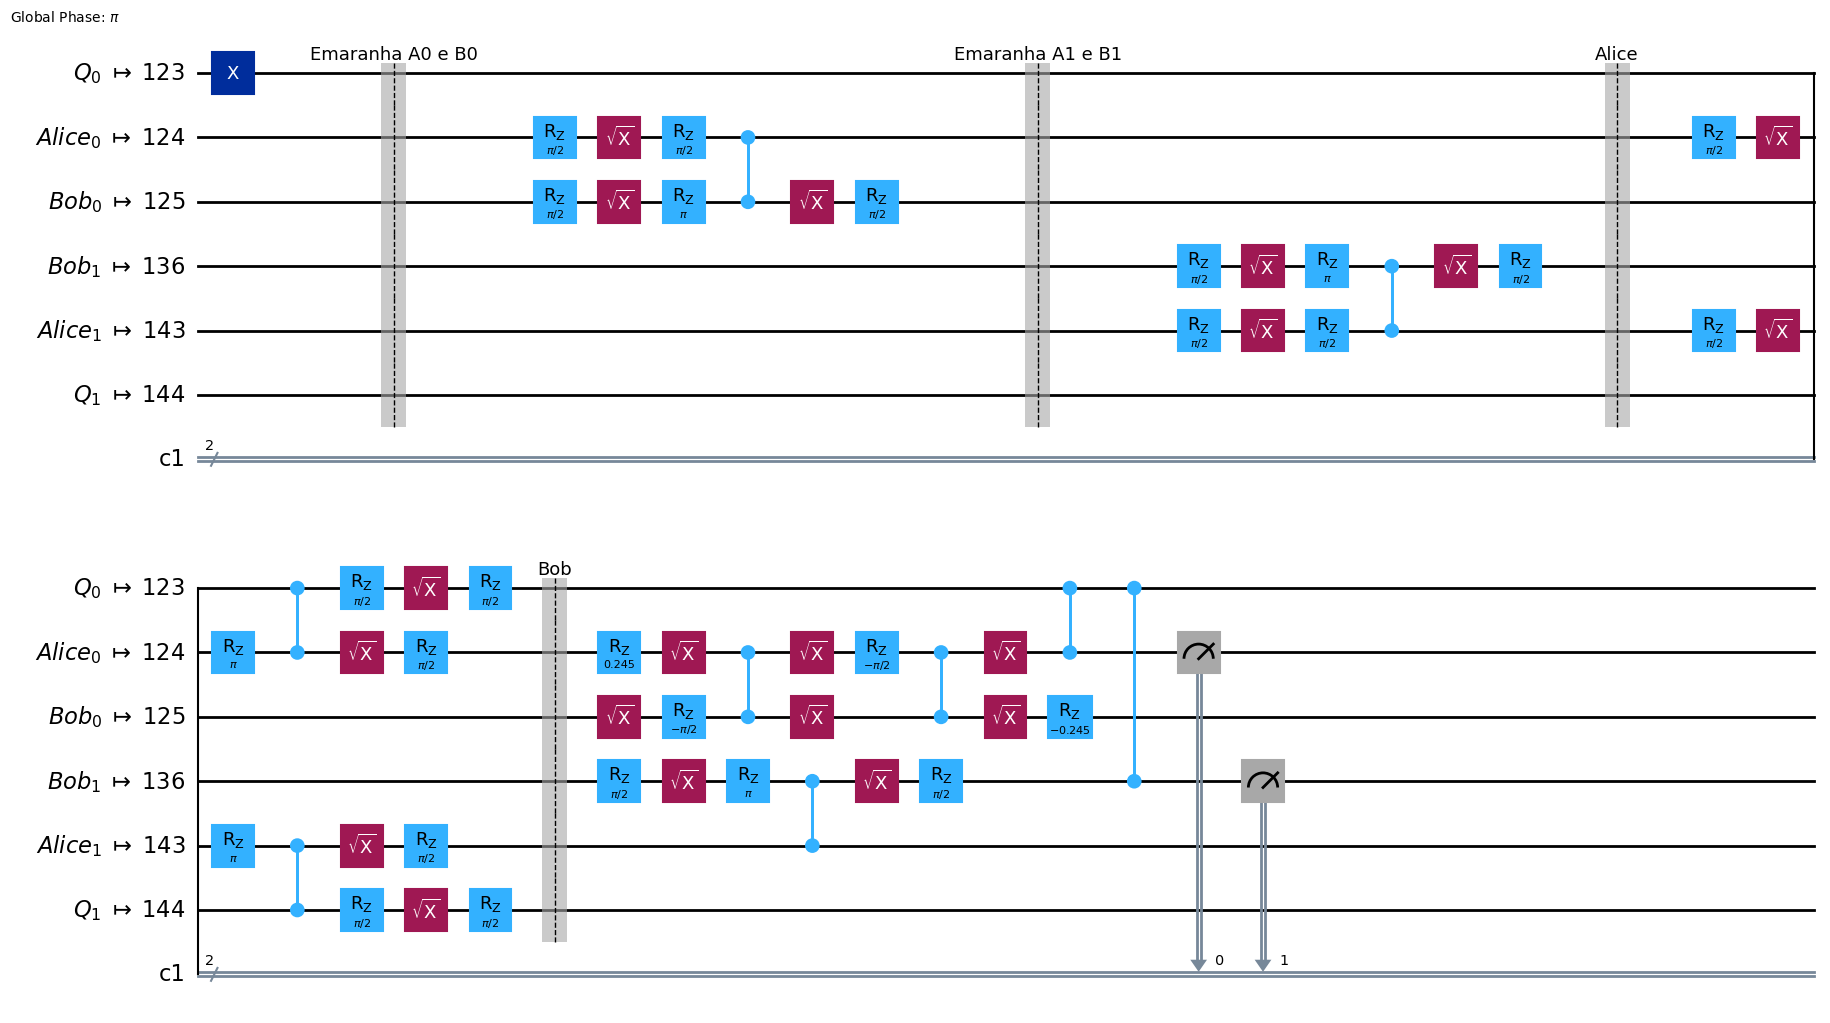

In [27]:
## Transpila para esse computador
qc_t = transpile(qcTq, backend)
qc_t.draw("mpl")

{'01': 934, '00': 53, '11': 13}


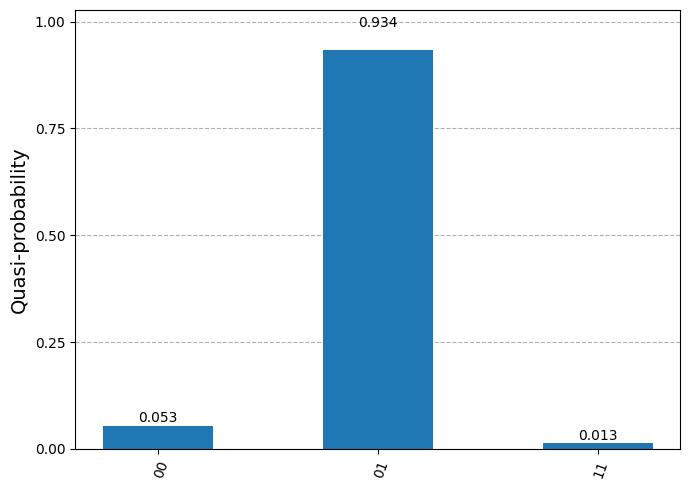

In [ ]:
# >- Executa em um computador da IBM -< #

sampler = SamplerV2(mode=backend)
n_shots = 1000

job = sampler.run([qc_t], shots=n_shots)

service = QiskitRuntimeService(
    channel='ibm_quantum_platform',
    instance=""
)
job_result = job.result()

pub_result = job_result[0].data.c1.get_counts() # <- Nessario alterar o cN para o cbit equivalente no circuito

print(pub_result)
plot_distribution(
    pub_result,
    filename="imgs/plot_nQubit_ibm.png"
)
plot_distribution(pub_result)

{'11': 958, '10': 25, '01': 16, '00': 1}


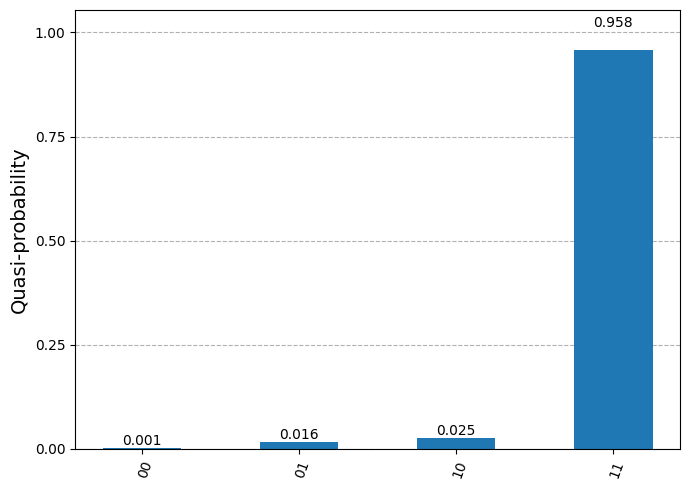

In [ ]:
# >- Busca o resultado -< #
service = QiskitRuntimeService(
    channel='ibm_quantum_platform',
    instance=''
)
job = service.job('')
job_result = job.result()

pub_result = job_result[0].data.c7.get_counts() # <- Nessario alterar o cN para o cbit equivalente no circuito

print(pub_result)
plot_distribution(
    pub_result,
    filename="imgs/plot_nQubit_ibm.png"
)
plot_distribution(pub_result)

### Circuito - Teleportando 1 Qubit em Superposição

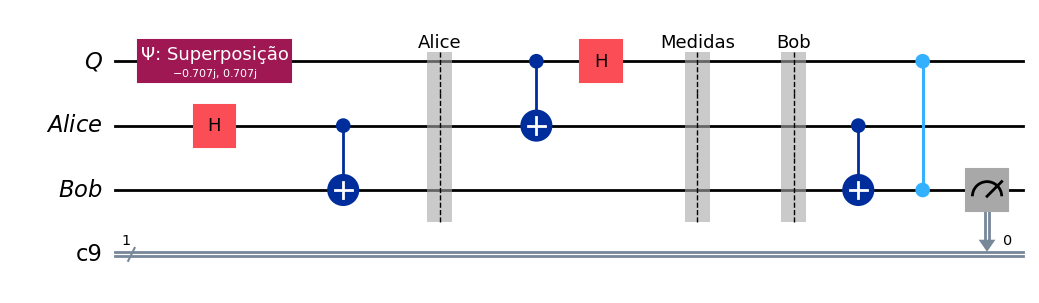

In [32]:
## >- Circuito: Teleporte Quântico em Superposição -< ##

Q = QuantumRegister(1, "Q") # Qubit com a informação
a_bit = QuantumRegister(1, "Alice") # Qubit da Alice
b_bit = QuantumRegister(1, "Bob") # Qubit do Bob

cbit = ClassicalRegister(1)

# Cria o circuito quântico com os qubits Q, Alice e Bob, e 1 bits clássicos
qcTq = QuantumCircuit(Q, a_bit, b_bit, cbit)

## Prepara um estado de supersposição ##
sqrt = 2 ** 0.5
vector = [-1j/sqrt, 1j/sqrt]
stateprep = StatePreparation(vector, label="Ψ: Superposição")
qcTq.append(stateprep, Q)

## Emaranha Alice e Bob ##
qcTq.h(1)
qcTq.cx(1, 2)

## Operações de Alice ##
qcTq.barrier(label="Alice")
qcTq.cx(0, 1)
qcTq.h(0)
qcTq.barrier(label="Medidas")

## Operações de Bob
qcTq.barrier(label="Bob")
qcTq.cx(1, 2)
qcTq.cz(0, 2)
qcTq.measure(2, 0)

qcTq.draw("mpl", filename="imgs/circuito_teleport_superposicao.png")

#### Simulação sem Ruído

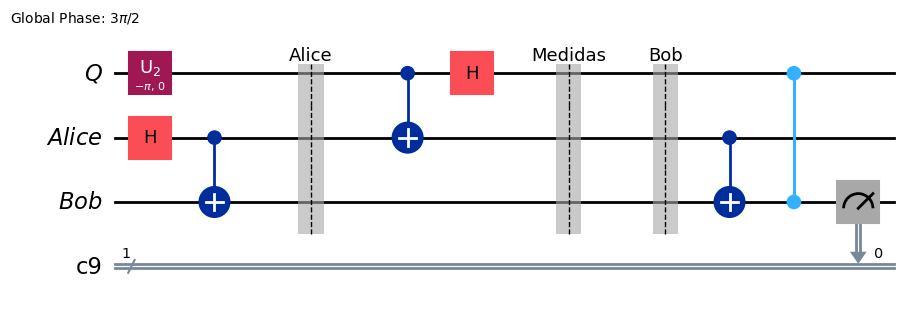

In [33]:
# >- Simulador sem ruído -< #

simulador = AerSimulator()

# Transpila para esse simulador
qc_t = transpile(qcTq, backend=simulador)
qc_t.draw('mpl')

{'1': 502, '0': 498}


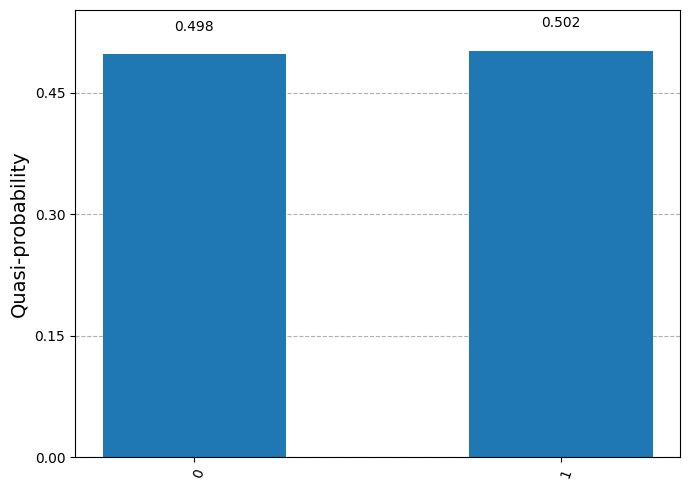

In [34]:
# >- Simulação sem ruído -< #

job = simulador.run(qc_t, shots=1000)

result = job.result()
counts = result.get_counts()

print(counts)
plot_distribution(
    counts,
    title="Simulação sem Ruído",
    filename="imgs/plot_superposicao_semRuido.png"
)
plot_distribution(counts)

#### Simulação com Ruído

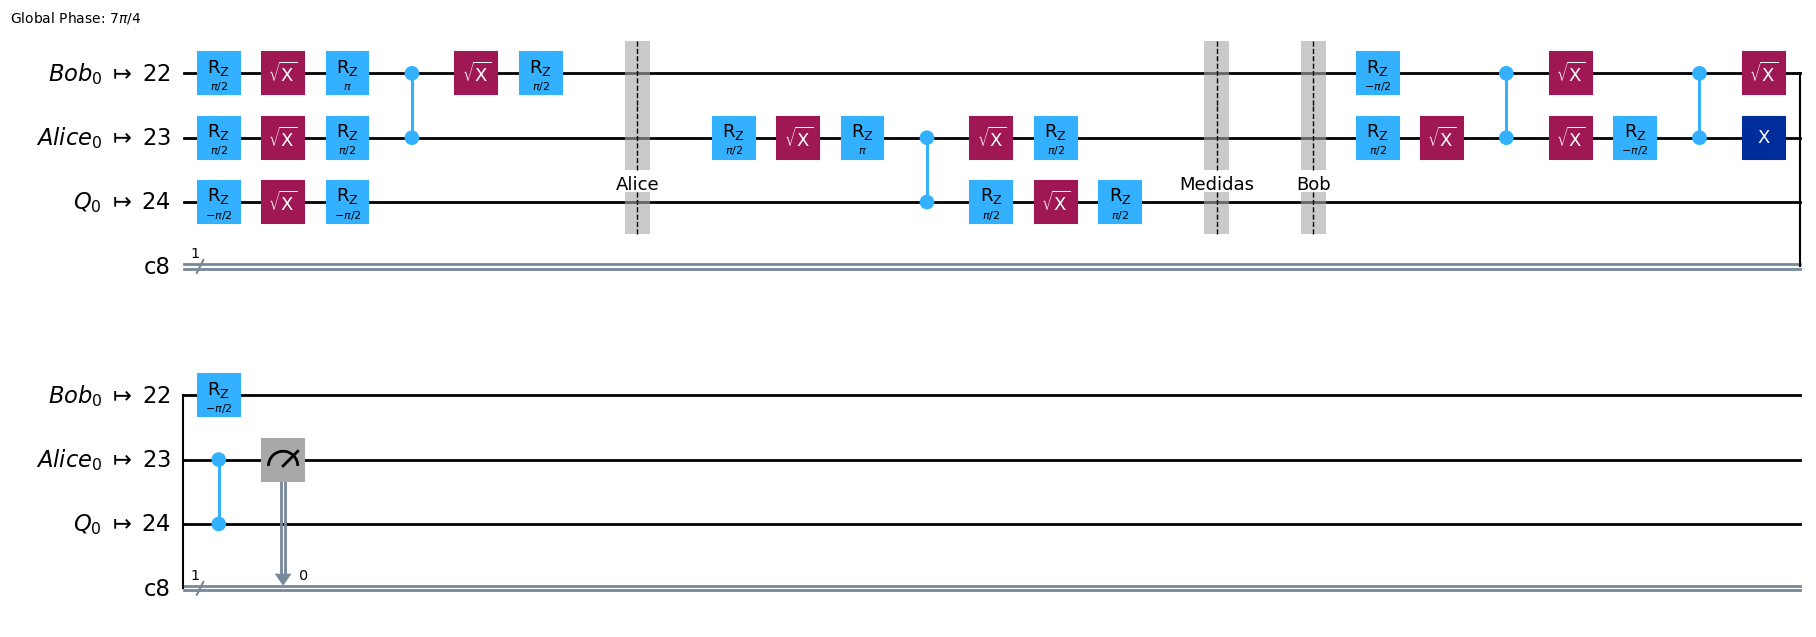

In [ ]:
# >- Simuadlor com ruído -< #

# Pega as caracteristicas do computador desejado
backend = FakeFez()
# Gera o simulador com base nas caracteristicas
simulador = AerSimulator.from_backend(backend)
# Transpilando o circuito para esse simulador
qc_t = transpile(qcTq, backend=simulador)
qc_t.draw("mpl")

{'1': 493, '0': 507}


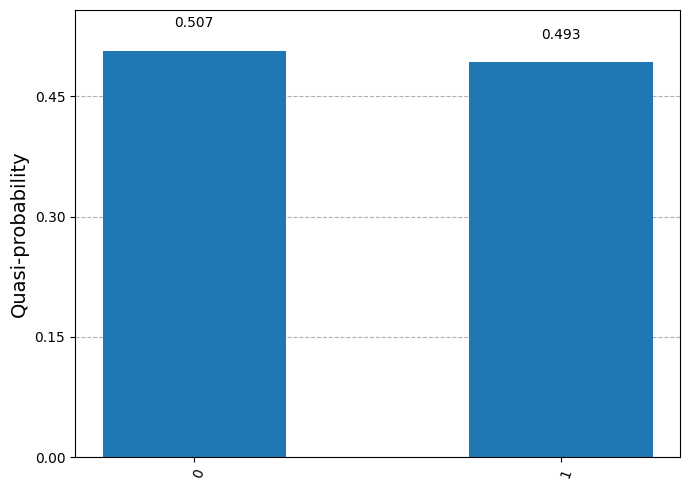

In [35]:
# >- Simulação com ruído -< #

n_shots = 1000
job = simulador.run(qc_t, shots=n_shots)

resultado = job.result()
counts = resultado.get_counts()

print(counts)
plot_distribution(
    counts,
    title="Simulação com Ruído",
    filename="imgs/plot_superposicao_comRuido.png"
)
plot_distribution(counts)

#### Rodando com IBM Backend

In [ ]:
## Escolho o computador menos oculpado
backend = QiskitRuntimeService().least_busy(operational=True, simulator=False, min_num_qubits=127)
print(backend)

<IBMBackend('ibm_fez')>


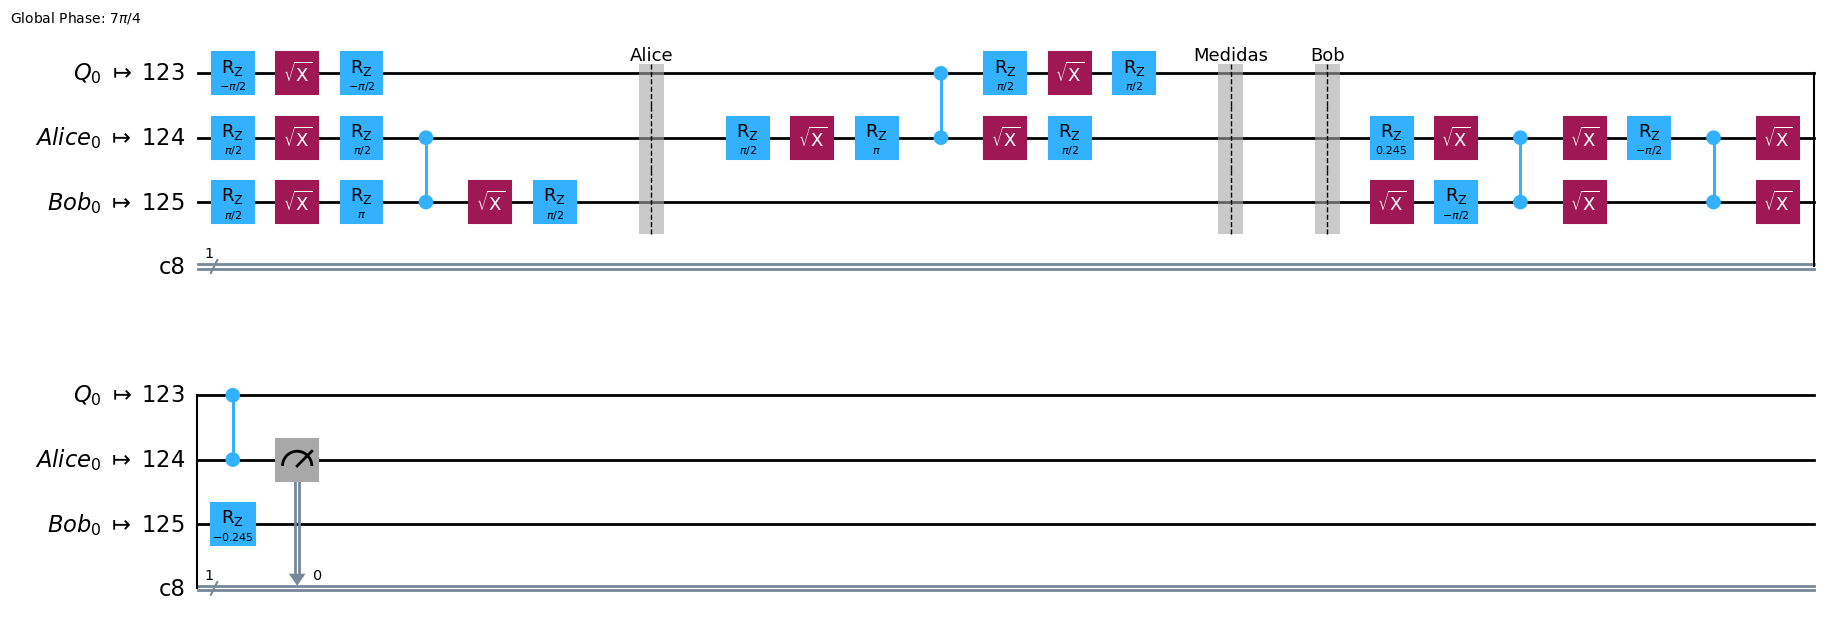

In [ ]:
## Transpila para esse
qc_t = transpile(qcTq, backend)
qc_t.draw("mpl")

{'0': 497, '1': 503}


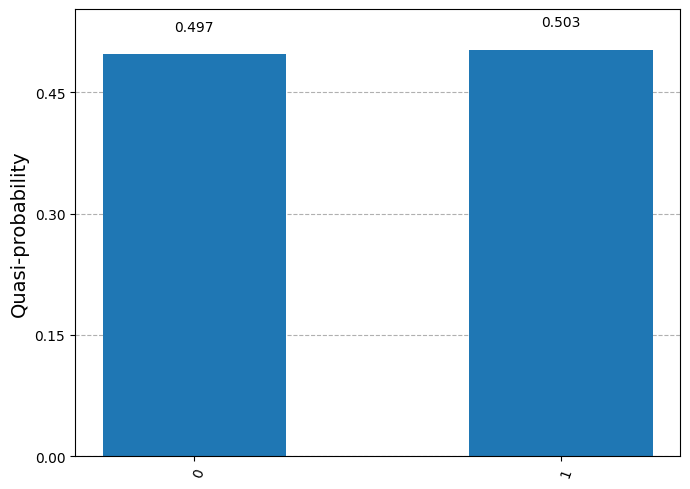

In [ ]:
# >- Executa em um computador da IBM -< #

sampler = SamplerV2(mode=backend)
n_shots = 1000

job = sampler.run([qc_t], shots=n_shots)

service = QiskitRuntimeService(
    channel='ibm_quantum_platform',
    instance=""
)
job_result = job.result()

pub_result = job_result[0].data.c8.get_counts() # <- Nessario alterar o cN para o cbit equivalente no circuito

print(pub_result)
plot_distribution(pub_result)

{'0': 497, '1': 503}


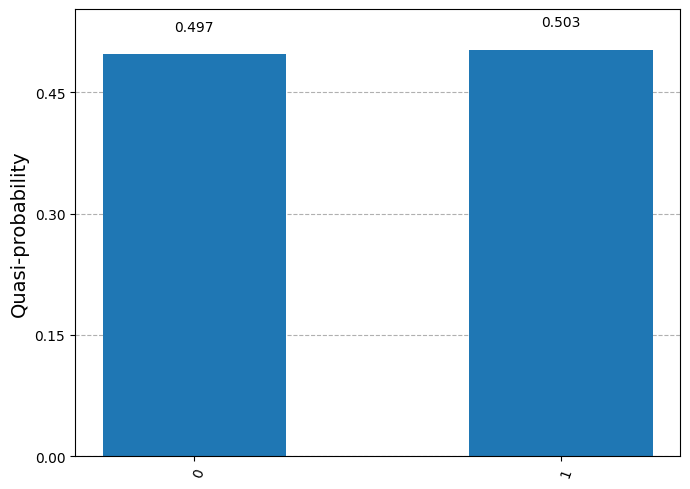

In [ ]:
# >- Busca o resultado -< #
service = QiskitRuntimeService(
    channel='ibm_quantum_platform',
    instance=''
)
job = service.job('')
job_result = job.result()

pub_result = job_result[0].data.c8.get_counts() # <- Nessario alterar o cN para o cbit equivalente no circuito

print(pub_result)
plot_distribution(
    counts,
    title="Backend IBM",
    filename="imgs/plot_superposicao_ibm.png"
)
plot_distribution(pub_result)

## Reflexão

As vantagens que os protocolos de comunicação quântica trazem ao jogo são a segurança e a eficiência (ou densidade de dados).

Na questão de segurança, o ganho advém do uso do emaranhamento quântico e do Teorema da Não-Clonagem.

Dentro do Teleporte Quântico, qualquer tentativa de medir ou interceptar o estado em trânsito colapsaria o estado quântico, destruindo assim a informação e alertando as partes envolvidas sobre a espionagem. Isso é usado como base para a Distribuição de Chaves Quânticas (QKD), que garante uma chave criptográfica mais segura.

Na Comunicação Densa, utiliza-se também um par de qubits emaranhados previamente compartilhados, para passar dois bits de informação clássica usando apenas um qubit entre as partes, explorando o par pré-compartilhado de qubits emaranhados.

Quando falamos de velocidade, podemos atrelar a eficiência ao protocolo.

No Teleporte Quântico, a velocidade de transferência do estado quântico é limitada pela velocidade de transmissão da informação clássica (os dois bits), necessária para que o receptor reconstrua o estado teleportado. O emaranhamento, de fato, não se limita pela velocidade da luz, sendo instantâneo. Mas o ponto forte do protocolo está na transferência fiel do estado quântico, crucial para a Internet Quântica, permitindo estender as redes quânticas sem o risco de perda de decoerência que acontece em repetidores clássicos.

Dentro da Comunicação Densa, temos a vantagem na densidade de dados, permitindo o envio do dobro de informação clássica (dois bits) usando o canal quântico de um qubit. Isso traz uma maior densidade de dados para a comunicação.